In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import get_data as data_call
import matplotlib

### Data Cleaning 
From the `get_data.py`, we are able to get the liked song and output into a csv. We have a list a favorite song with its respective ids and artists. 
<br> 
In this section, we are getting the audio features from spotify through spotipy to do our song analysis
<br> 
In this data, we only taking first 250 songs and index 0 as the recently added

In [2]:
fav_song_list = pd.read_csv('fav_song_list.csv')
fav_song_list.head()

,song_name,song_id,artist_name,artist_id,popularity,added_at,released_date
0,Arcade,1Xi84slp6FryDSCbzq4UCD,Duncan Laurence,3klZnJvYGIbWritVwQD434,88,2021-04-24T02:08:24Z,2019-03-07
1,Jealous,4G92yYrUs0cvY7G41YRI0z,Labrinth,2feDdbD5araYcm6JhFHHw7,79,2021-04-23T22:00:51Z,2014-11-23
2,If the World Was Ending - feat. Julia Michaels,2kJwzbxV2ppxnQoYw4GLBZ,JP Saxe,66W9LaWS0DPdL7Sz8iYGYe,85,2021-04-18T22:54:13Z,2019-10-17
3,刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心...,3OC84eKMxRJ4x0Hcwl9i4i,Crowd Lu,2JBUyLiFvpFPWdZGqIGYLD,71,2021-04-10T22:06:31Z,2020-08-25
4,流著淚說分手,7LMPRmLVC5seyuf5n6gKZi,小文,1klqNQAhhI5d4P5WWpBIEe,21,2021-04-10T19:18:06Z,2009-03-06


In [3]:
# authentication, one of the function that I have wrote in get_data_py
sp = data_call.create_user_auth()

In [4]:
#requesting audio features from Spotify
audio_feature_sample=sp.audio_features(fav_song_list['song_id'][2])
print(audio_feature_sample)

[{'danceability': 0.464, 'energy': 0.473, 'key': 1, 'loudness': -10.086, 'mode': 1, 'speechiness': 0.129, 'acousticness': 0.866, 'instrumentalness': 0, 'liveness': 0.109, 'valence': 0.604, 'tempo': 75.801, 'type': 'audio_features', 'id': '2kJwzbxV2ppxnQoYw4GLBZ', 'uri': 'spotify:track:2kJwzbxV2ppxnQoYw4GLBZ', 'track_href': 'https://api.spotify.com/v1/tracks/2kJwzbxV2ppxnQoYw4GLBZ', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2kJwzbxV2ppxnQoYw4GLBZ', 'duration_ms': 208687, 'time_signature': 4}]


In [5]:
# creating a list of audio features(appending each dictionary into the list)
list_of_audio_features=[]
for index, row in fav_song_list.iterrows():
    audio_features= sp.audio_features(row["song_id"])
    list_of_audio_features.append(audio_features[0])

In [6]:
#creating a data frame of audio features with the list 
audio_features_list=pd.DataFrame(list_of_audio_features)

In [7]:
# renaming id to song_id to allow overlapping
audio_features_list=audio_features_list.rename(columns={"id" : "song_id"})

In [8]:
# join the overlap which is song_id
df = audio_features_list.combine_first(fav_song_list)

#getting the list of the columns
cols = df.columns.tolist()

#reordering the columns and our final dataset has been set into df
df = df[['song_name','song_id','artist_id','artist_name','popularity','acousticness','danceability','energy','instrumentalness','key',
         'liveness','loudness','mode','speechiness','tempo','valence','time_signature','duration_ms','added_at', 'released_date']]
df

,song_name,song_id,artist_id,artist_name,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_signature,duration_ms,added_at,released_date
0,Arcade,1Xi84slp6FryDSCbzq4UCD,3klZnJvYGIbWritVwQD434,Duncan Laurence,88.0,0.81800,0.450,0.329,0.00109,9,0.1350,-12.603,0,0.0441,71.884,0.266,3,183624,2021-04-24T02:08:24Z,2019-03-07
1,Jealous,4G92yYrUs0cvY7G41YRI0z,2feDdbD5araYcm6JhFHHw7,Labrinth,79.0,0.87400,0.439,0.153,0.00000,1,0.1070,-8.950,1,0.0479,116.760,0.104,3,287693,2021-04-23T22:00:51Z,2014-11-23
2,If the World Was Ending - feat. Julia Michaels,2kJwzbxV2ppxnQoYw4GLBZ,66W9LaWS0DPdL7Sz8iYGYe,JP Saxe,85.0,0.86600,0.464,0.473,0.00000,1,0.1090,-10.086,1,0.1290,75.801,0.604,4,208687,2021-04-18T22:54:13Z,2019-10-17
3,刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心...,3OC84eKMxRJ4x0Hcwl9i4i,2JBUyLiFvpFPWdZGqIGYLD,Crowd Lu,71.0,0.87300,0.425,0.201,0.00000,10,0.1110,-11.961,1,0.0373,136.328,0.267,4,320166,2021-04-10T22:06:31Z,2020-08-25
4,流著淚說分手,7LMPRmLVC5seyuf5n6gKZi,1klqNQAhhI5d4P5WWpBIEe,小文,21.0,0.91200,0.650,0.148,0.00000,10,0.1190,-13.396,0,0.0396,77.936,0.276,4,250093,2021-04-10T19:18:06Z,2009-03-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Shake It Off,0GG7ei637NDIN2w11TWtLC,06HL4z0CvFAxyc27GXpf02,Taylor Swift,0.0,0.06000,0.646,0.778,0.00000,7,0.4970,-5.364,1,0.1580,160.082,0.945,4,219200,2014-09-24T15:22:54Z,2014-08-19
496,Blame (feat. John Newman),7EYWEwJyai7udNmqvRPsZM,7CajNmpbOovFoOoasH2HaY,Calvin Harris,11.0,0.02820,0.412,0.859,0.00766,0,0.4040,-4.096,0,0.0850,127.931,0.367,4,214427,2014-09-24T15:22:48Z,2014-09-07
497,They Don't Know About Us,72C7aUQECOhNtnD0AC36ua,4AK6F7OLvEQ5QYCBNiQWHq,One Direction,4.0,0.13500,0.512,0.754,0.00000,0,0.0881,-6.031,1,0.0549,147.890,0.336,4,201693,2014-09-07T09:20:56Z,2012-11-09
498,Midnight Memories,5wjmqUGN7vrAqFqDWrywlZ,4AK6F7OLvEQ5QYCBNiQWHq,One Direction,72.0,0.00725,0.432,0.868,0.00000,6,0.2330,-2.010,0,0.0882,156.128,0.567,4,176320,2014-09-07T09:20:55Z,2013-11-25


### Data Analysis 
We had got the data that we need from Spotify and all the audio features are now in a data frame, we are ready to do our song analysis. 

Before ploting any graph, we need to understand our dataset. 
##### Understanding our Dataset 
* basic identifier of the song which is the song name with its id and the artist(s) that is(are) performing
* `acousticness` = measurement of the acoustic feature of the song , 1 being high probability of acoustic 
* `danceability` = measurement of the suitability for a dance
* `energy` = measurement of intensity
* `instrumentalness` = measurement it likelihood of being an instrumental song (no vocal content)
* `key` = pitches of the song (C= 0, C#/Db=1...) (12 notes in an octave)
* `liveness` = detect the presence of live audience 
* `loudness` = how loud of the song in decibles (dB)
* `mode` = major or minor 
* `speechiness` = detect the spoken words in a track
* `tempo` = bpm of the track
* `valence` = mood of the song 
* `time_signature` = the number of beats in each bar
* `duration_ms` = how long of the song in miliseconds
* `popularity` = how popular of the song based on the number of plays on that song and how recent is that play
For more clearer information check the spotify api : https://developer.spotify.com/documentation/web-api/reference/#object-audiofeaturesobject

I always think that I listen to some slow and mellow music. We can start by plotting the average tempo the list

In [9]:
# getting the average tempo of all songs 
avg_tempo = df["tempo"].mean()
print("Average Tempo: " + str(avg_tempo))
max_tempo = df["tempo"].max()
print("Max Tempo: " + str(max_tempo))
min_tempo = df["tempo"].min()
print("Min Tempo: "+ str(min_tempo))
max_index = df["tempo"].idxmax()
max_tempo_track = df.iloc[max_index]
print("Track with max tempo: " + max_tempo_track["song_name"])
min_index = df["tempo"].idxmin()
min_tempo_track= df.iloc[min_index]
print("Track with min tempo: " + min_tempo_track["song_name"])

Average Tempo: 120.81880400000001
Max Tempo: 205.903
Min Tempo: 53.863
Track with max tempo: FourFiveSeconds
Track with min tempo: The Hanging Tree


In [10]:
# sort out the features that I want to explore
features_to_explore = df[["acousticness" , "danceability" , "energy", "key","loudness","tempo","valence","popularity"]]
features_to_explore

,acousticness,danceability,energy,key,loudness,tempo,valence,popularity
0,0.81800,0.450,0.329,9,-12.603,71.884,0.266,88.0
1,0.87400,0.439,0.153,1,-8.950,116.760,0.104,79.0
2,0.86600,0.464,0.473,1,-10.086,75.801,0.604,85.0
3,0.87300,0.425,0.201,10,-11.961,136.328,0.267,71.0
4,0.91200,0.650,0.148,10,-13.396,77.936,0.276,21.0
...,...,...,...,...,...,...,...,...
495,0.06000,0.646,0.778,7,-5.364,160.082,0.945,0.0
496,0.02820,0.412,0.859,0,-4.096,127.931,0.367,11.0
497,0.13500,0.512,0.754,0,-6.031,147.890,0.336,4.0
498,0.00725,0.432,0.868,6,-2.010,156.128,0.567,72.0


In [11]:
# this function will plot each feature(series) to a normal distribution
def each_features_hist(dataseries):
    plt.figure(figsize=[6,4])
    n, bins, patches = plt.hist(x=df[dataseries], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel(f"{dataseries}",fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.title(f'Normal Distribution Histogram with audio feature: {dataseries}',fontsize=15)
    plt.axvline(df[dataseries].mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(df[dataseries].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df[dataseries].mean()))
    plt.show()

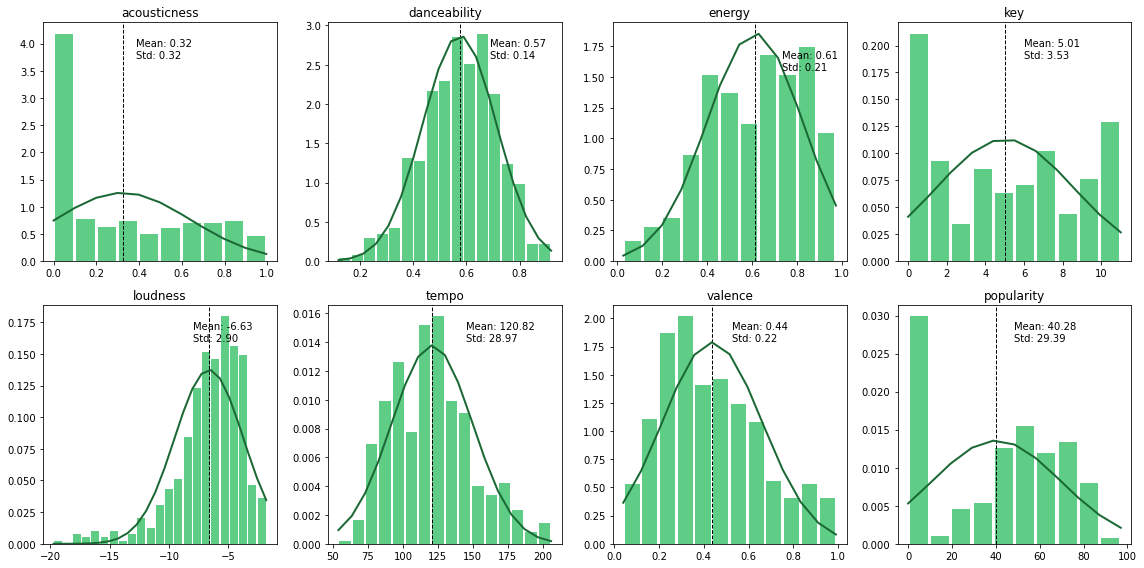

In [12]:
import numpy as np
from scipy.optimize import curve_fit

# normal distribution of my fav songs list

fig1, axs = plt.subplots(2,4, tight_layout=True,figsize=(16,8))
for i in range(0,2):
    for j in range(0,4):
        count = j + 4*(i)
        data = features_to_explore.iloc[:,count]
        #histogram
        n , bins , patches = axs[i,j].hist(x=data, bins='auto', color='#1db954',alpha=0.7, rwidth=0.85,density=True)
        #setting the titles and labels
        axs[i,j].set_title(data.name)
        ylimit = axs[i,j].get_ylim()[1]
        xlimit = axs[i,j].get_xlim()[1]
        mean = data.mean()
        std = data.std()
        # the dotted line in the mean
        axs[i,j].axvline(mean, color='k', linestyle='dashed', linewidth=1)
        axs[i,j].text(mean*1.2, ylimit*0.9, 'Mean: {:.2f}'.format(mean))
        axs[i,j].text(mean*1.2, ylimit*0.85, 'Std: {:.2f}'.format(std))
        # normal curve
        axs[i,j].plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2) ),
                 linewidth=2, color='#1a6834')
        


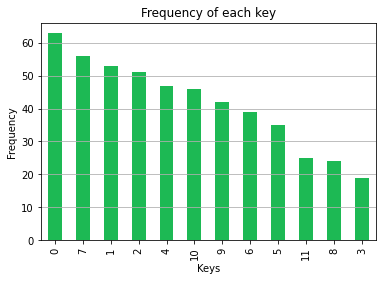

In [13]:
# finding the frequency of each keys in my fav song list
fig2 = plt.figure()
df["key"].value_counts().plot(kind="bar", color='#1db954')
plt.xlabel("Keys")
plt.ylabel("Frequency")
plt.title("Frequency of each key")
plt.grid(axis="y")
plt.show()
fig2.savefig("Frequency_of_each_key.png")

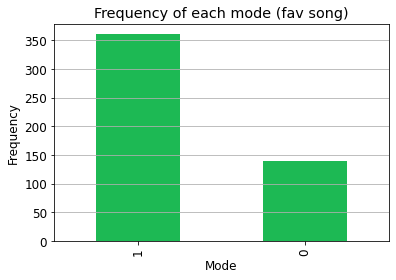

In [77]:
# find the frequency of modes in my fav song list 
fig3 = plt.figure()
df['mode'].value_counts().plot(kind="bar", color='#1db954')
plt.xlabel("Mode")
plt.ylabel("Frequency")
plt.title("Frequency of each mode (fav song)")
plt.grid(axis="y")
plt.show()
fig3.savefig("Frequency_of_each_mode(fav_song).png")


In [15]:
mean_of_data = df.mean(axis=0)
mean_of_data

popularity              40.280000
acousticness             0.323331
danceability             0.574096
energy                   0.611044
instrumentalness         0.009223
key                      5.012000
liveness                 0.179186
loudness                -6.634466
mode                     0.722000
speechiness              0.057968
tempo                  120.818804
valence                  0.437493
time_signature           3.946000
duration_ms         226239.410000
dtype: float64

In [16]:
mean_of_audio_features = mean_of_data.drop(["popularity","key","tempo","loudness","time_signature","duration_ms"])

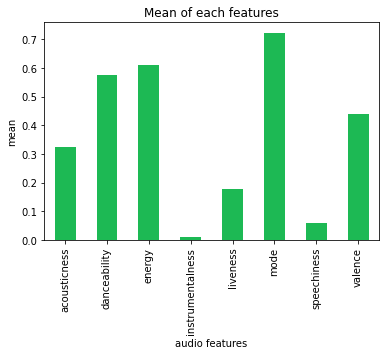

In [17]:
# getting the mean of each features, just to see big picture of each mean 
fig4 = plt.figure()
histogram= mean_of_audio_features.plot.bar(color='#1db954', figsize=(6,4))
plt.xticks(rotation = 90)
plt.xlabel("audio features")
plt.ylabel("mean")
plt.title("Mean of each features")
plt.show()
fig4.savefig("mean_of_each_features.png")

In [18]:
# this help me to get the range of each features(coloums)
def get_basic_stats(data_series):
    result = []
    avg = df[data_series].mean()
    result.append({"Avg":avg})
    maximum = df[data_series].max()
    result.append({"max":maximum})
    minimum = df[data_series].min()
    result.append({"min":minimum})
    max_index = df[data_series].idxmax()
    max_track = df.iloc[max_index]
    max_track = max_track["song_name"]
    result.append({"Max Track":max_track})
    min_index = df[data_series].idxmin()
    min_track = df.iloc[min_index]
    min_track = min_track["song_name"]
    result.append({"Min Track":min_track})
    return result

In [19]:
get_basic_stats("valence")

[{'Avg': 0.43749319999999975},
 {'max': 0.991},
 {'min': 0.0398},
 {'Max Track': '愛的初體驗'},
 {'Min Track': 'Happy Little Pill'}]

In [20]:
get_basic_stats("danceability")

[{'Avg': 0.574096},
 {'max': 0.918},
 {'min': 0.119},
 {'Max Track': 'Low (feat. T-Pain)'},
 {'Min Track': 'Game of Thrones Medley'}]

In [21]:
get_basic_stats("energy")

[{'Avg': 0.6110441999999998},
 {'max': 0.972},
 {'min': 0.026},
 {'Max Track': '我的果汁分你一半'},
 {'Min Track': 'Moon River'}]

In [22]:
get_basic_stats("acousticness")

[{'Avg': 0.32333136319999967},
 {'max': 0.995},
 {'min': 6.56e-05},
 {'Max Track': 'Moon River'},
 {'Min Track': 'Butter-Fly'}]

In [86]:
# find the correlationship between data (with pandas)
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_signature,duration_ms
popularity,1.000000,0.090489,0.020790,-0.040412,-0.033603,0.066776,-0.076850,-0.008136,0.035570,0.008857,-0.019681,-0.072190,-0.019575,0.068382
acousticness,0.090489,1.000000,-0.284590,-0.793058,0.065888,-0.000716,-0.171248,-0.616042,0.101010,-0.191504,-0.123601,-0.368140,-0.244285,0.189227
danceability,0.020790,-0.284590,1.000000,0.333319,-0.158065,-0.006620,0.040729,0.346090,-0.086082,0.167249,-0.159161,0.507044,0.229254,-0.281689
energy,-0.040412,-0.793058,0.333319,1.000000,-0.052096,-0.009263,0.190900,0.802929,-0.096964,0.277686,0.178875,0.559301,0.280519,-0.223695
instrumentalness,-0.033603,0.065888,-0.158065,-0.052096,1.000000,-0.038122,0.046406,-0.159433,-0.020905,0.000726,-0.011068,-0.103529,0.006999,-0.008762
key,0.066776,-0.000716,-0.006620,-0.009263,-0.038122,1.000000,0.006569,-0.036050,-0.009291,0.019439,0.010839,-0.043927,0.066091,0.057702
liveness,-0.076850,-0.171248,0.040729,0.190900,0.046406,0.006569,1.000000,0.096042,-0.027980,0.182632,0.008436,0.069794,0.051089,-0.082157
loudness,-0.008136,-0.616042,0.346090,0.802929,-0.159433,-0.036050,0.096042,1.000000,-0.090214,0.171843,0.196215,0.446717,0.254144,-0.199579
mode,0.035570,0.101010,-0.086082,-0.096964,-0.020905,-0.009291,-0.027980,-0.090214,1.000000,-0.074402,-0.048348,0.012089,0.085479,-0.007727
speechiness,0.008857,-0.191504,0.167249,0.277686,0.000726,0.019439,0.182632,0.171843,-0.074402,1.000000,0.124661,0.250756,0.074286,-0.159867


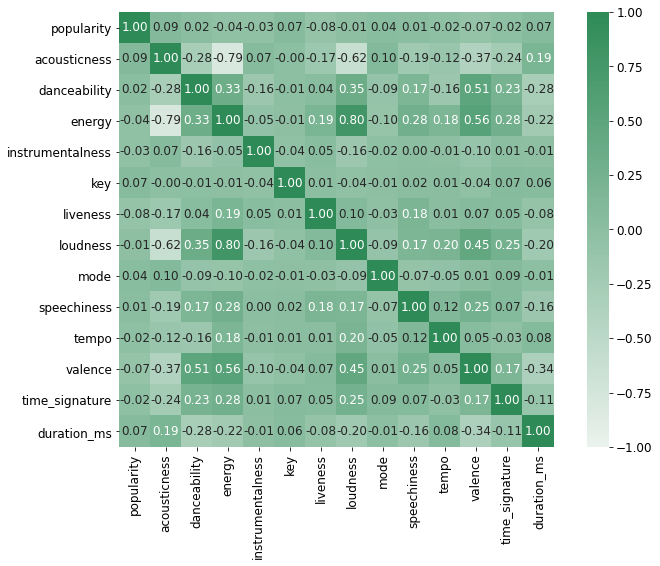

In [99]:
# heatmap with sns
import seaborn as sns

plt.figure(figsize=(12, 8))
axis_corr = sns.heatmap(corr_matrix,vmin=-1, vmax=1, center=0,cmap=sns.light_palette("seagreen", as_cmap=True),
                        square=True,annot=True,fmt=".2f")

plt.show()
fig8 = axis_corr .get_figure()    
fig8.savefig("Correlation.png")

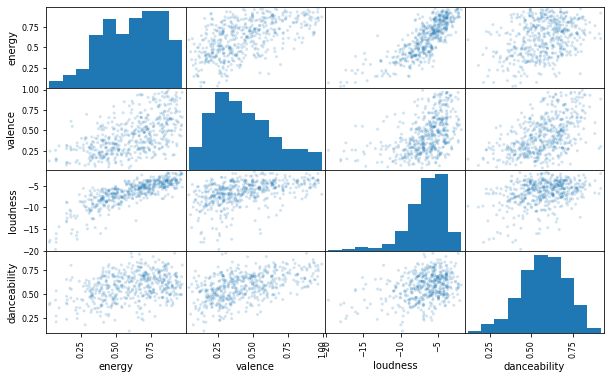

In [24]:
# scatter plot for the feature where I think it is interesting
sample_2 = df [["energy","valence","loudness","danceability"]]
pd.plotting.scatter_matrix(sample_2, alpha=0.2 , figsize=(10,6))
plt.show()

As we can see from the scatter matrix, the energy has a really high positive correlation with loudnesss. This means that the louder the song, the higher the energy. 

In [31]:
# my playlist compare to today's pop 
billboard_df = pd.read_csv('billboard.csv')
billboard_df


,song_id,song_name,artists,artists_id,popularity
0,43PGPuHIlVOc04jrZVh9L6,RAPSTAR,"[{'artist_name': 'Polo G', 'artist_id': '6AgTA...",NaN,94
1,3BZEcbdtXQSo7OrvKRJ6mb,MONTERO (Call Me By Your Name),"[{'artist_name': 'Lil Nas X', 'artist_id': '7j...",NaN,94
2,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,"[{'artist_name': 'Bruno Mars', 'artist_id': '0...",NaN,96
3,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),"[{'artist_name': 'Justin Bieber', 'artist_id':...",NaN,100
4,5QO79kh1waicV47BqGRL3g,Save Your Tears,"[{'artist_name': 'The Weeknd', 'artist_id': '1...",NaN,96
...,...,...,...,...,...
95,5NUXE8W12lWcUXgJRCjeEw,One Too Many,"[{'artist_name': 'Keith Urban', 'artist_id': '...",NaN,77
96,3cBsEDNhFI9E82vPj3kvi3,Wasted On You,"[{'artist_name': 'Morgan Wallen', 'artist_id':...",NaN,80
97,0XqQxKtAdYbOC8OVIjWLZD,Dancing With The Devil,"[{'artist_name': 'Demi Lovato', 'artist_id': '...",NaN,71
98,7IhfjcaXuXCq20ZiAA7igK,Gone,"[{'artist_name': 'Dierks Bentley', 'artist_id'...",NaN,75


In [32]:
list_of_audio_features=[]
for index, row in billboard_df.iterrows():
    audio_features= sp.audio_features(row["song_id"])
    list_of_audio_features.append(audio_features[0])
    
audio_features_billboard =pd.DataFrame(list_of_audio_features)
audio_features_billboard= audio_features_billboard.rename(columns={"id" : "song_id"})
audio_features_billboard

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,song_id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.789,0.536,6,-6.862,1,0.2420,0.41000,0.000000,0.1290,0.437,81.039,audio_features,43PGPuHIlVOc04jrZVh9L6,spotify:track:43PGPuHIlVOc04jrZVh9L6,https://api.spotify.com/v1/tracks/43PGPuHIlVOc...,https://api.spotify.com/v1/audio-analysis/43PG...,165926,4
1,0.610,0.508,8,-6.682,0,0.1520,0.29700,0.000000,0.3840,0.758,178.818,audio_features,3BZEcbdtXQSo7OrvKRJ6mb,spotify:track:3BZEcbdtXQSo7OrvKRJ6mb,https://api.spotify.com/v1/tracks/3BZEcbdtXQSo...,https://api.spotify.com/v1/audio-analysis/3BZE...,137876,4
2,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,audio_features,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,https://api.spotify.com/v1/tracks/7MAibcTli4Ii...,https://api.spotify.com/v1/audio-analysis/7MAi...,242096,4
3,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,audio_features,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...,https://api.spotify.com/v1/audio-analysis/4iJy...,198082,4
4,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,audio_features,5QO79kh1waicV47BqGRL3g,spotify:track:5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/tracks/5QO79kh1waic...,https://api.spotify.com/v1/audio-analysis/5QO7...,215627,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.697,0.535,4,-6.504,1,0.0680,0.24700,0.000000,0.5690,0.594,82.959,audio_features,5NUXE8W12lWcUXgJRCjeEw,spotify:track:5NUXE8W12lWcUXgJRCjeEw,https://api.spotify.com/v1/tracks/5NUXE8W12lWc...,https://api.spotify.com/v1/audio-analysis/5NUX...,203893,4
96,0.505,0.657,11,-5.240,0,0.0318,0.37300,0.001070,0.1260,0.252,196.000,audio_features,3cBsEDNhFI9E82vPj3kvi3,spotify:track:3cBsEDNhFI9E82vPj3kvi3,https://api.spotify.com/v1/tracks/3cBsEDNhFI9E...,https://api.spotify.com/v1/audio-analysis/3cBs...,178520,3
97,0.413,0.640,8,-5.811,1,0.0427,0.27300,0.000000,0.1100,0.149,75.245,audio_features,0XqQxKtAdYbOC8OVIjWLZD,spotify:track:0XqQxKtAdYbOC8OVIjWLZD,https://api.spotify.com/v1/tracks/0XqQxKtAdYbO...,https://api.spotify.com/v1/audio-analysis/0XqQ...,243992,4
98,0.521,0.746,6,-6.173,1,0.0351,0.00985,0.000000,0.0741,0.473,149.977,audio_features,7IhfjcaXuXCq20ZiAA7igK,spotify:track:7IhfjcaXuXCq20ZiAA7igK,https://api.spotify.com/v1/tracks/7IhfjcaXuXCq...,https://api.spotify.com/v1/audio-analysis/7Ihf...,205960,4


In [33]:
audio_features_billboard['popularity']= billboard_df['popularity']

In [35]:
features_to_explore_2 = audio_features_billboard[["acousticness" , "danceability" , "energy", "key","loudness","tempo","valence","popularity"]]
features_to_explore_2

,acousticness,danceability,energy,key,loudness,tempo,valence,popularity
0,0.41000,0.789,0.536,6,-6.862,81.039,0.437,94
1,0.29700,0.610,0.508,8,-6.682,178.818,0.758,94
2,0.18200,0.586,0.616,5,-7.964,148.088,0.719,96
3,0.32100,0.677,0.696,0,-6.181,90.030,0.464,100
4,0.02120,0.680,0.826,0,-5.487,118.051,0.644,96
...,...,...,...,...,...,...,...,...
95,0.24700,0.697,0.535,4,-6.504,82.959,0.594,77
96,0.37300,0.505,0.657,11,-5.240,196.000,0.252,80
97,0.27300,0.413,0.640,8,-5.811,75.245,0.149,71
98,0.00985,0.521,0.746,6,-6.173,149.977,0.473,75


In [41]:
features_to_explore

,acousticness,danceability,energy,key,loudness,tempo,valence,popularity
0,0.81800,0.450,0.329,9,-12.603,71.884,0.266,88.0
1,0.87400,0.439,0.153,1,-8.950,116.760,0.104,79.0
2,0.86600,0.464,0.473,1,-10.086,75.801,0.604,85.0
3,0.87300,0.425,0.201,10,-11.961,136.328,0.267,71.0
4,0.91200,0.650,0.148,10,-13.396,77.936,0.276,21.0
...,...,...,...,...,...,...,...,...
495,0.06000,0.646,0.778,7,-5.364,160.082,0.945,0.0
496,0.02820,0.412,0.859,0,-4.096,127.931,0.367,11.0
497,0.13500,0.512,0.754,0,-6.031,147.890,0.336,4.0
498,0.00725,0.432,0.868,6,-2.010,156.128,0.567,72.0


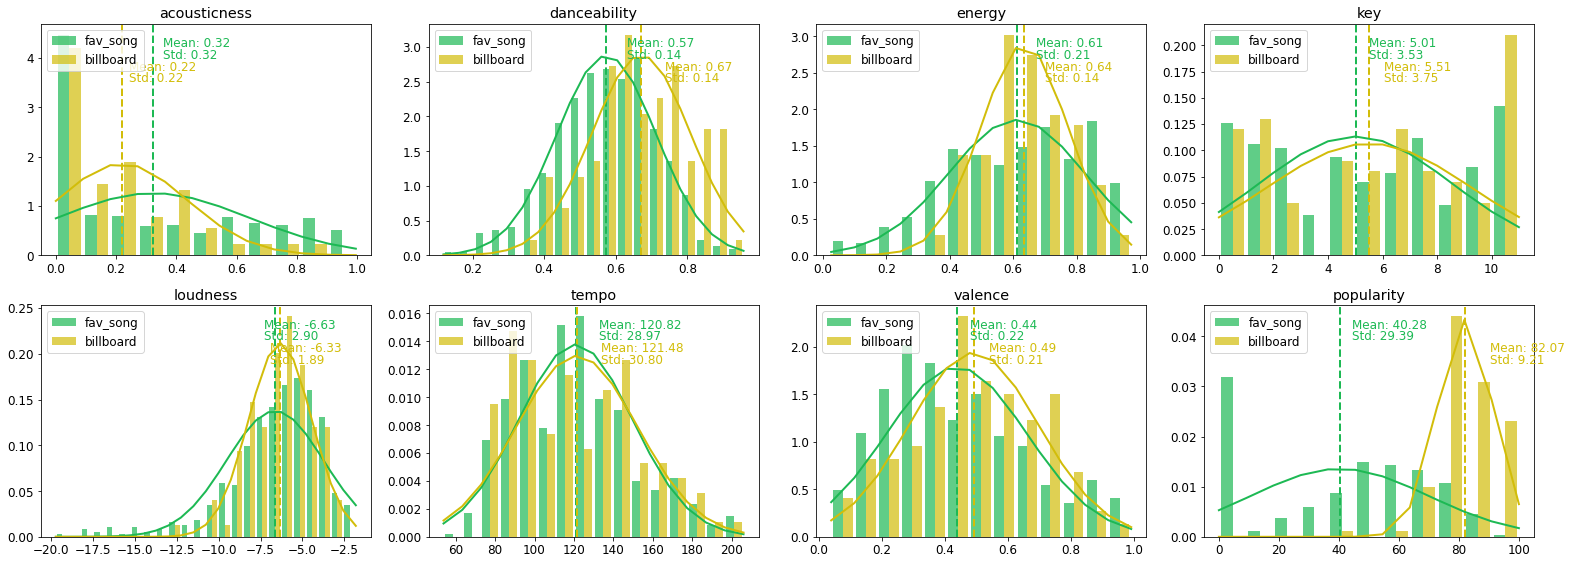

In [71]:
# comparison between my fav song list with billboard top 100 
fig5, axs = plt.subplots(2,4, tight_layout=True,figsize=(22,8))
for i in range(0,2):
    for j in range(0,4):
        count = j + 4*(i)
        data1 = features_to_explore.iloc[:,count]
        data2 = features_to_explore_2.iloc[:,count]
        #histogram
        n , bins , patches = axs[i,j].hist([data1, data2], bins='auto', color=['#1db954','#d2bd0a'],alpha=0.7, rwidth=0.85,density=True, label=['fav_song',"billboard"])
        #setting the titles and labels
        axs[i,j].set_title(data1.name)
        axs[i,j].legend(loc='upper left')
        ylimit = axs[i,j].get_ylim()[1]
        xlimit = axs[i,j].get_xlim()[1]
        mean1 = data1.mean()
        std1 = data1.std()
        mean2 = data2.mean()
        std2 = data2.std()
        # the dotted line in the mean
        axs[i,j].axvline(mean1, color='#1db954', linestyle='dashed', linewidth=2)
        axs[i,j].axvline(mean2, color='#d2bd0a', linestyle='dashed', linewidth=2)
        axs[i,j].text(mean1*1.1, ylimit*0.9, 'Mean: {:.2f}'.format(mean1) , color = '#1db954')
        axs[i,j].text(mean1*1.1, ylimit*0.85, 'Std: {:.2f}'.format(std1), color = '#1db954')
        axs[i,j].text(mean2*1.1, ylimit*0.8, 'Mean: {:.2f}'.format(mean2), color = '#d2bd0a')
        axs[i,j].text(mean2*1.1, ylimit*0.75, 'Std: {:.2f}'.format(std2) , color = '#d2bd0a')
        # normal curve
        axs[i,j].plot(bins, 1/(std1 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean1)**2 / (2 * std1**2) ),
                 linewidth=2, color='#1db954')
        axs[i,j].plot(bins, 1/(std2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean2)**2 / (2 * std2**2) ),
                 linewidth=2, color='#d2bd0a')
fig5.savefig("Comparison.png")    

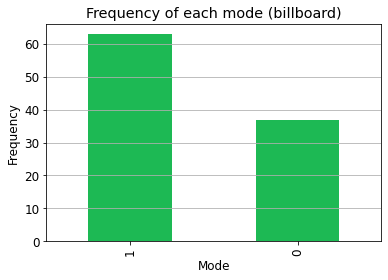

In [78]:
# number of modes in billboard 
fig6 = plt.figure()
audio_features_billboard['mode'].value_counts().plot(kind="bar", color='#1db954')
plt.xlabel("Mode")
plt.ylabel("Frequency")
plt.title("Frequency of each mode (billboard)")
plt.grid(axis="y")
plt.show()
fig6.savefig("Frequency_of_each_mode(billboard).png")

## Times series exploration with my favourite song list 

This is the part where I try to find out my mood based on the time I added the song to my "liked song" playlist. But I wasn't using Spotify often in 2017-2019 so a part of the analysis will not helpful. 

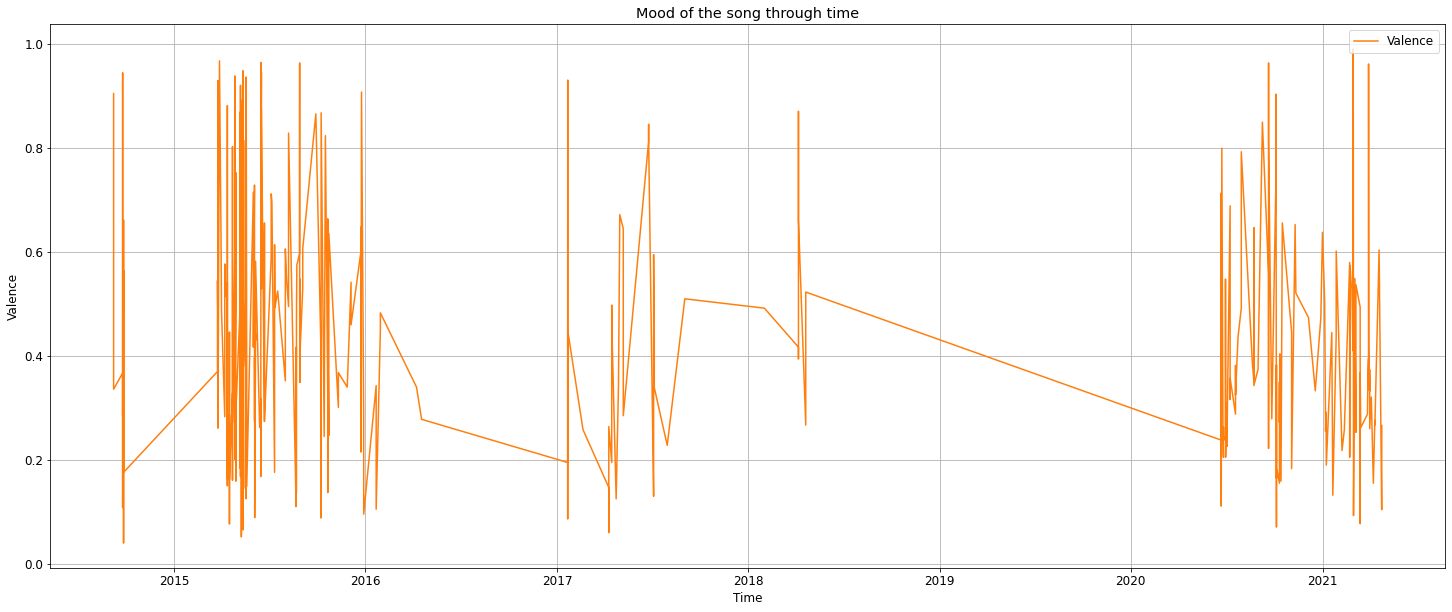

In [26]:
# check out with the time added songs 
df['added_at']=pd.to_datetime(df['added_at']) # change added_at to datetime format

# I want to see the timeline of me adding the song (is there any pattern in adding the songs?)
# changing my index to date added 
time_based_df = df.set_index('added_at').copy()


# now I need to plot the time frame 
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(25, 10))

# Specify how our lines should look
ax.plot(df['added_at'], df['valence'], color='tab:orange', label='Valence')


# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Valence')
ax.set_title('Mood of the song through time')
ax.grid(True)
ax.legend(loc='upper right');


Text(0.5, 1.0, 'Number of songs added for each year')

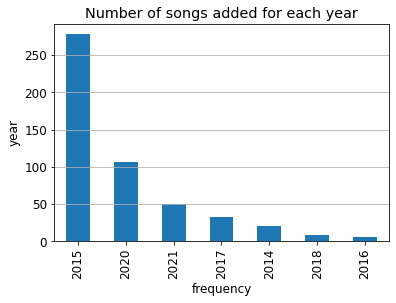

In [27]:
time_based_df.index.year.value_counts().plot.bar()
plt.grid(axis='y')
plt.xlabel('frequency')
plt.ylabel('year')
plt.title('Number of songs added for each year')

In [28]:
# looks like I am not using spotify in 2019 
annual_added = time_based_df.resample(rule='A').mean()
annual_added = annual_added.fillna(0)
annual_added

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_signature,duration_ms
added_at,,,,,,,,,,,,,,
2014-12-31 00:00:00+00:00,19.250000,0.147206,0.562500,0.697450,0.000428,3.950000,0.265270,-5.227950,0.600000,0.052245,126.910200,0.452490,4.000000,212525.650000
2015-12-31 00:00:00+00:00,36.514388,0.241701,0.571827,0.659071,0.008832,4.766187,0.177924,-6.171406,0.715827,0.054344,121.295633,0.461159,3.964029,219483.208633
2016-12-31 00:00:00+00:00,54.333333,0.489667,0.607000,0.491333,0.004549,6.000000,0.176167,-8.733333,0.833333,0.052217,107.403000,0.333333,3.666667,219060.333333
2017-12-31 00:00:00+00:00,34.375000,0.308578,0.574781,0.593969,0.063044,4.531250,0.162797,-7.008062,0.781250,0.084481,115.448688,0.401531,3.937500,234948.687500
2018-12-31 00:00:00+00:00,41.500000,0.405300,0.642750,0.636000,0.000003,4.500000,0.177338,-6.295500,0.500000,0.079300,121.982500,0.506875,3.875000,227870.375000
2019-12-31 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-31 00:00:00+00:00,46.849057,0.448334,0.578208,0.545906,0.000678,5.641509,0.189391,-7.069472,0.726415,0.062074,121.338179,0.405242,3.924528,238298.150943
2021-12-31 00:00:00+00:00,57.600000,0.559006,0.567260,0.468850,0.000617,5.740000,0.141282,-8.412740,0.780000,0.052018,119.490580,0.392696,3.920000,238751.460000


In [29]:
# resempaling to monthly added
montly_added = time_based_df.resample("M").mean()
montly_added = montly_added.fillna(0)
montly_added

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_signature,duration_ms
added_at,,,,,,,,,,,,,,
2014-09-30 00:00:00+00:00,19.250000,0.147206,0.562500,0.697450,0.000428,3.950000,0.265270,-5.227950,0.600000,0.052245,126.910200,0.452490,4.000000,212525.650000
2014-10-31 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-11-30 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-12-31 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-31 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 00:00:00+00:00,53.500000,0.400112,0.604000,0.658000,0.000000,3.000000,0.196000,-6.720750,0.750000,0.029350,110.990750,0.479750,3.750000,227436.750000
2021-01-31 00:00:00+00:00,59.250000,0.581263,0.608500,0.447812,0.000002,4.625000,0.107375,-8.730750,0.875000,0.046925,107.171500,0.357125,4.000000,219481.875000
2021-02-28 00:00:00+00:00,57.285714,0.447643,0.584857,0.537071,0.000099,5.642857,0.140271,-7.519357,0.642857,0.069179,134.312786,0.492929,3.928571,244019.142857


<AxesSubplot:xlabel='added_at'>

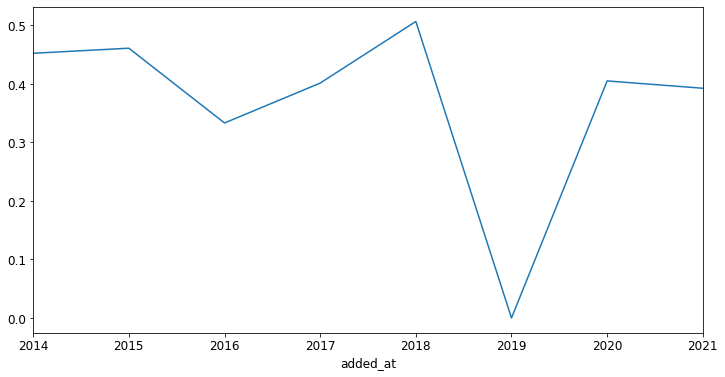

In [30]:
annual_added['valence'].plot( figsize=(12,6))